### Stack Overflow Survey



#### 1. Business Understanding
Stack Overflow is the gateway of many developers and here we have this dataset which contains a survey data about Stack Overflow users and our mission here is to answer the below 3 questions effectively.


First, Let's load the dataset and any needed resources (to be updated as we go).

In [1]:
# Importing necessary resources:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset:
df = pd.read_csv('Dataset/survey_results_public.csv')

#### 2. Data Understanding
Let's check the data visually and state the 3 questions.

In [3]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### The 3 Questions are:
1. Is there a relation between Gender & Salary ?
2. Is there a relation between Period of WFH and Job Satisfaction Rating ?
3. Is there a relation between Salary and Job Satisfaction Rating ?


After we chose the questions, let's have a deeper look on the data.

#### 3. Prepare Data

In [4]:
df = df[['Country', 'HomeRemote', 'Gender', 'JobSatisfaction', 'Salary']]
df.shape

(51392, 5)

In [5]:
df.describe()

,JobSatisfaction,Salary
count,40376.000000,12891.000000
mean,6.957078,56298.480641
std,2.167652,39880.905277
min,0.000000,0.000000
25%,6.000000,26440.371839
50%,7.000000,50000.000000
75%,8.000000,80000.000000
max,10.000000,197000.000000


"Country", "HomeRemote" & "Gender" were not displayed as they are categorical variables.

Since the counts in the before previous cell is not equal to the number of raws in the prevous cell then we have null values.
Let's check them.

In [6]:
# The following function is used to calculate the precentage of the null values per column
# so we can decide whcih to drop and which to keep. 


def calc_null_percentage(data_frame):
    for col in data_frame.columns:
        print(" Precentage of missing values in the column", col, "is",data_frame[col].isnull().mean()*100, "%")
    return

calc_null_percentage(df)

 Precentage of missing values in the column Country is 0.0 %
 Precentage of missing values in the column HomeRemote is 14.367995018679949 %
 Precentage of missing values in the column Gender is 31.804561021170606 %
 Precentage of missing values in the column JobSatisfaction is 21.435242839352426 %
 Precentage of missing values in the column Salary is 74.91632938978829 %


From the a/m, we can drop the null values of HomeRemote, JobSatisfaction & Gender but regarding Salary we can't do that because the precentage of the missing values is very high (will ruin the entire data).

In [7]:
# Dropping the raws which contains null values in HomeRemote, JobSatisfaction & Gender:
df = df.dropna(subset=['HomeRemote', 'JobSatisfaction', 'Gender'], axis=0)

# Imputing the null values of Salary with the mean():
df['Salary'] = df['Salary'].fillna(df.Salary.mean())
df.shape

(28988, 5)

In [8]:
df.describe()

,JobSatisfaction,Salary
count,28988.000000,28988.000000
mean,6.993791,57075.322959
std,2.135514,25151.530797
min,0.000000,0.000000
25%,6.000000,57075.322959
50%,7.000000,57075.322959
75%,8.000000,57075.322959
max,10.000000,197000.000000


Now we can see that our data is concistent and clean and now we can start our analysis 

#### 4. Data Modeling

In [9]:
# Question 1:

df1=df.query("(Gender == 'Male' or Gender == 'Female')").groupby(['Gender']).mean()['Salary']
df1

Gender
Female    57418.252065
Male      57009.050905
Name: Salary, dtype: float64

**From the a/m results, the average salary is almost the same regardless the gender.**

In [10]:
# Question 2:

df2=pd.DataFrame(df.groupby(['HomeRemote']).mean()['Salary'].sort_values())
df2

,Salary
HomeRemote,
Never,52796.176951
It's complicated,56298.415093
"More than half, but not all, the time",56919.014366
About half the time,57399.203329
A few days each month,58314.884386
"Less than half the time, but at least one day each week",60659.943703
All or almost all the time (I'm full-time remote),61803.493185


**From the a/m results, the average salary is not directly proportional with the WFH period but it is noticable that WFH completly is the lowest Salary and working from office completly is the highest**

In [11]:
# Question 3:

df3=df[['Salary', 'JobSatisfaction']]
# No calculations is needed here, the result will appear in the graph.

Now, Let's visualize out results.

#### 5. Evaluate the Results

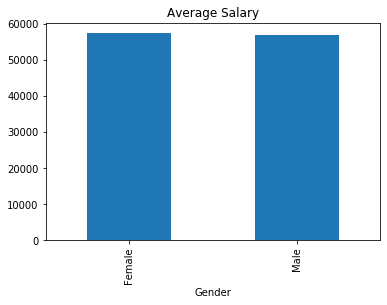

In [12]:
df1.plot(kind="bar");
plt.title("Average Salary");

**From the a/m results, the average salary is almost the same regardless the gender.**

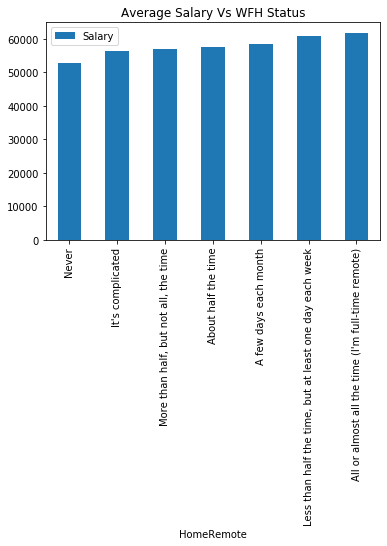

In [13]:
df2.plot(kind="bar");
plt.title("Average Salary Vs WFH Status");

**From the a/m results, the average salary is not directly proportional with the WFH period but it is noticable that WFH completly is the lowest Salary and working from office completly is the highest**

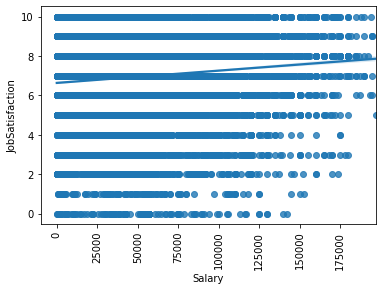

In [14]:
sns.regplot(data = df3, x = 'Salary', y = 'JobSatisfaction');
plt.xticks(rotation=90);

**From the a/m graph, JobSatisfaction has a positive correlation with Salary.**